#  Reading and Exploring Data: 

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('rec.csv')

In [3]:
data.head(6)

,ID,DATE_DEMANDE,STATUT,CORPS
0,140,05/05/19 12:54:40,En cours de traitement,J'ai un problème pour mon carte
1,141,05/05/19 13:43:14,En cours de traitement,Bonjour. Je n'ai pas pu retirer de l'argent de...
2,142,05/05/19 13:50:22,En cours de traitement,¿¿¿¿¿¿ 11450¿¿¿¿¿ ¿¿¿ ¿¿¿ ¿¿¿¿ ¿¿¿ 20 ¿¿¿ ¿¿¿¿...
3,143,05/05/19 14:15:18,En cours de traitement,"Bonjour, j'arrive pas a effectuer un retrait. ..."
4,144,05/05/19 15:07:05,En cours de traitement,"J¿ai effectué un paiement de 69,500 Dt avec ma..."
5,145,05/05/19 15:17:10,En cours de traitement,Jai pas pu retirais de money du dab UIB \r\nMe...


In [4]:
import nltk

In [5]:
#nltk.download()

In [6]:
import pandas as pd
data=pd.read_csv('rec.csv')
pd.set_option('display.max_colwidth',150) #extend column width
data.head()

,ID,DATE_DEMANDE,STATUT,CORPS
0,140,05/05/19 12:54:40,En cours de traitement,J'ai un problème pour mon carte
1,141,05/05/19 13:43:14,En cours de traitement,Bonjour. Je n'ai pas pu retirer de l'argent de mon compte KENZ et mon plafond de retrait est a zero malgres que je n'ai jamais retire de l'argent ...
2,142,05/05/19 13:50:22,En cours de traitement,¿¿¿¿¿¿ 11450¿¿¿¿¿ ¿¿¿ ¿¿¿ ¿¿¿¿ ¿¿¿ 20 ¿¿¿ ¿¿¿¿ ¿¿¿¿
3,143,05/05/19 14:15:18,En cours de traitement,"Bonjour, j'arrive pas a effectuer un retrait. \r\nMsg du distribuer : carte plafonnée \r\n \r\nRéclamation : je n'ai pas atteint mon plafond de re..."
4,144,05/05/19 15:07:05,En cours de traitement,"J¿ai effectué un paiement de 69,500 Dt avec ma carte sur TPE le 5 mai 2019 qui a été refusé 2 fois alors que mon plafond est de 5000 Dt."


 #  Preprocessing Data:

###   1-Convert sentence of column 'CORPS' to lowercase 

In [7]:
data['CORPS']=[dt.lower()for dt in data['CORPS']]
data.head()

,ID,DATE_DEMANDE,STATUT,CORPS
0,140,05/05/19 12:54:40,En cours de traitement,j'ai un problème pour mon carte
1,141,05/05/19 13:43:14,En cours de traitement,bonjour. je n'ai pas pu retirer de l'argent de mon compte kenz et mon plafond de retrait est a zero malgres que je n'ai jamais retire de l'argent ...
2,142,05/05/19 13:50:22,En cours de traitement,¿¿¿¿¿¿ 11450¿¿¿¿¿ ¿¿¿ ¿¿¿ ¿¿¿¿ ¿¿¿ 20 ¿¿¿ ¿¿¿¿ ¿¿¿¿
3,143,05/05/19 14:15:18,En cours de traitement,"bonjour, j'arrive pas a effectuer un retrait. \r\nmsg du distribuer : carte plafonnée \r\n \r\nréclamation : je n'ai pas atteint mon plafond de re..."
4,144,05/05/19 15:07:05,En cours de traitement,"j¿ai effectué un paiement de 69,500 dt avec ma carte sur tpe le 5 mai 2019 qui a été refusé 2 fois alors que mon plafond est de 5000 dt."


###   2-Remove punctuation 

In [8]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def remove_punc(corps):
    corps_nopunc= "".join([c for c in corps if c not in string.punctuation and c != '¿'])
    return corps_nopunc

data['CORPS']=data['CORPS'].apply(lambda x: remove_punc(x))
data.head()

,ID,DATE_DEMANDE,STATUT,CORPS
0,140,05/05/19 12:54:40,En cours de traitement,jai un problème pour mon carte
1,141,05/05/19 13:43:14,En cours de traitement,bonjour je nai pas pu retirer de largent de mon compte kenz et mon plafond de retrait est a zero malgres que je nai jamais retire de largent de ce...
2,142,05/05/19 13:50:22,En cours de traitement,11450 20
3,143,05/05/19 14:15:18,En cours de traitement,bonjour jarrive pas a effectuer un retrait \r\nmsg du distribuer carte plafonnée \r\n \r\nréclamation je nai pas atteint mon plafond de retrait ...
4,144,05/05/19 15:07:05,En cours de traitement,jai effectué un paiement de 69500 dt avec ma carte sur tpe le 5 mai 2019 qui a été refusé 2 fois alors que mon plafond est de 5000 dt


###   3-Remove New line and Carriage return 

In [10]:
def remove_nL(corps):
    corps_noNL= "".join ([c for c in corps if c != '\n' and c != '\r'])
    return corps_noNL

data['CORPS']=data['CORPS'].apply(lambda x: remove_nL(x))
data.head()


,ID,DATE_DEMANDE,STATUT,CORPS
0,140,05/05/19 12:54:40,En cours de traitement,jai un problème pour mon carte
1,141,05/05/19 13:43:14,En cours de traitement,bonjour je nai pas pu retirer de largent de mon compte kenz et mon plafond de retrait est a zero malgres que je nai jamais retire de largent de ce...
2,142,05/05/19 13:50:22,En cours de traitement,11450 20
3,143,05/05/19 14:15:18,En cours de traitement,bonjour jarrive pas a effectuer un retrait msg du distribuer carte plafonnée réclamation je nai pas atteint mon plafond de retrait merci de me...
4,144,05/05/19 15:07:05,En cours de traitement,jai effectué un paiement de 69500 dt avec ma carte sur tpe le 5 mai 2019 qui a été refusé 2 fois alors que mon plafond est de 5000 dt


###  4-Tokenize field 'COPRS' 

In [11]:
import re

def tokenize(corps):
    clean_corps= re.split('\W+',corps)
    return clean_corps

data['CORPS']=data['CORPS'].apply(lambda x: tokenize(x))
data.head()

,ID,DATE_DEMANDE,STATUT,CORPS
0,140,05/05/19 12:54:40,En cours de traitement,"[jai, un, problème, pour, mon, carte]"
1,141,05/05/19 13:43:14,En cours de traitement,"[bonjour, je, nai, pas, pu, retirer, de, largent, de, mon, compte, kenz, et, mon, plafond, de, retrait, est, a, zero, malgres, que, je, nai, jamai..."
2,142,05/05/19 13:50:22,En cours de traitement,"[, 11450, 20, ]"
3,143,05/05/19 14:15:18,En cours de traitement,"[bonjour, jarrive, pas, a, effectuer, un, retrait, msg, du, distribuer, carte, plafonnée, réclamation, je, nai, pas, atteint, mon, plafond, de, re..."
4,144,05/05/19 15:07:05,En cours de traitement,"[jai, effectué, un, paiement, de, 69500, dt, avec, ma, carte, sur, tpe, le, 5, mai, 2019, qui, a, été, refusé, 2, fois, alors, que, mon, plafond, ..."


###   5-Remove Stopwords 

In [12]:
from nltk.corpus import stopwords
stop_words = stopwords.words('french')
print(stop_words)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [13]:
def remove_stopwords(corps):
    filtered_words = [mot for mot in corps if mot not in stop_words]
    return filtered_words

data['CORPS']=data['CORPS'].apply(lambda x: remove_stopwords(x))
data.head()

,ID,DATE_DEMANDE,STATUT,CORPS
0,140,05/05/19 12:54:40,En cours de traitement,"[jai, problème, carte]"
1,141,05/05/19 13:43:14,En cours de traitement,"[bonjour, nai, pu, retirer, largent, compte, kenz, plafond, retrait, a, zero, malgres, nai, jamais, retire, largent, compte, merci, corriger, plaf..."
2,142,05/05/19 13:50:22,En cours de traitement,"[, 11450, 20, ]"
3,143,05/05/19 14:15:18,En cours de traitement,"[bonjour, jarrive, a, effectuer, retrait, msg, distribuer, carte, plafonnée, réclamation, nai, atteint, plafond, retrait, merci, contacter, asap]"
4,144,05/05/19 15:07:05,En cours de traitement,"[jai, effectué, paiement, 69500, dt, carte, tpe, 5, mai, 2019, a, refusé, 2, fois, alors, plafond, 5000, dt]"


###   6-Stemming data 

In [14]:
porter = nltk.PorterStemmer()

def stemming(corps):
    corps_stemmed = [porter.stem(mot) for mot in corps]
    return corps_stemmed

data['CORPS_stemma']=data['CORPS'].apply(lambda x: stemming(x))
data.head()

,ID,DATE_DEMANDE,STATUT,CORPS,CORPS_stemma
0,140,05/05/19 12:54:40,En cours de traitement,"[jai, problème, carte]","[jai, problèm, cart]"
1,141,05/05/19 13:43:14,En cours de traitement,"[bonjour, nai, pu, retirer, largent, compte, kenz, plafond, retrait, a, zero, malgres, nai, jamais, retire, largent, compte, merci, corriger, plaf...","[bonjour, nai, pu, retir, largent, compt, kenz, plafond, retrait, a, zero, malgr, nai, jamai, retir, largent, compt, merci, corrig, plafond, retra..."
2,142,05/05/19 13:50:22,En cours de traitement,"[, 11450, 20, ]","[, 11450, 20, ]"
3,143,05/05/19 14:15:18,En cours de traitement,"[bonjour, jarrive, a, effectuer, retrait, msg, distribuer, carte, plafonnée, réclamation, nai, atteint, plafond, retrait, merci, contacter, asap]","[bonjour, jarriv, a, effectu, retrait, msg, distribu, cart, plafonné, réclamat, nai, atteint, plafond, retrait, merci, contact, asap]"
4,144,05/05/19 15:07:05,En cours de traitement,"[jai, effectué, paiement, 69500, dt, carte, tpe, 5, mai, 2019, a, refusé, 2, fois, alors, plafond, 5000, dt]","[jai, effectué, paiement, 69500, dt, cart, tpe, 5, mai, 2019, a, refusé, 2, foi, alor, plafond, 5000, dt]"


###  7-lemmatizing data 

In [15]:
wnl=nltk.WordNetLemmatizer()

def lemmatizing(corps):
    corps_lemmatized = [wnl.lemmatize(mot) for mot in corps]
    return corps_lemmatized

data['CORPS_lemma']=data['CORPS'].apply(lambda x: lemmatizing(x))
data.head()

,ID,DATE_DEMANDE,STATUT,CORPS,CORPS_stemma,CORPS_lemma
0,140,05/05/19 12:54:40,En cours de traitement,"[jai, problème, carte]","[jai, problèm, cart]","[jai, problème, carte]"
1,141,05/05/19 13:43:14,En cours de traitement,"[bonjour, nai, pu, retirer, largent, compte, kenz, plafond, retrait, a, zero, malgres, nai, jamais, retire, largent, compte, merci, corriger, plaf...","[bonjour, nai, pu, retir, largent, compt, kenz, plafond, retrait, a, zero, malgr, nai, jamai, retir, largent, compt, merci, corrig, plafond, retra...","[bonjour, nai, pu, retirer, largent, compte, kenz, plafond, retrait, a, zero, malgres, nai, jamais, retire, largent, compte, merci, corriger, plaf..."
2,142,05/05/19 13:50:22,En cours de traitement,"[, 11450, 20, ]","[, 11450, 20, ]","[, 11450, 20, ]"
3,143,05/05/19 14:15:18,En cours de traitement,"[bonjour, jarrive, a, effectuer, retrait, msg, distribuer, carte, plafonnée, réclamation, nai, atteint, plafond, retrait, merci, contacter, asap]","[bonjour, jarriv, a, effectu, retrait, msg, distribu, cart, plafonné, réclamat, nai, atteint, plafond, retrait, merci, contact, asap]","[bonjour, jarrive, a, effectuer, retrait, msg, distribuer, carte, plafonnée, réclamation, nai, atteint, plafond, retrait, merci, contacter, asap]"
4,144,05/05/19 15:07:05,En cours de traitement,"[jai, effectué, paiement, 69500, dt, carte, tpe, 5, mai, 2019, a, refusé, 2, fois, alors, plafond, 5000, dt]","[jai, effectué, paiement, 69500, dt, cart, tpe, 5, mai, 2019, a, refusé, 2, foi, alor, plafond, 5000, dt]","[jai, effectué, paiement, 69500, dt, carte, tpe, 5, mai, 2019, a, refusé, 2, fois, alors, plafond, 5000, dt]"


In [16]:
data

,ID,DATE_DEMANDE,STATUT,CORPS,CORPS_stemma,CORPS_lemma
0,140,05/05/19 12:54:40,En cours de traitement,"[jai, problème, carte]","[jai, problèm, cart]","[jai, problème, carte]"
1,141,05/05/19 13:43:14,En cours de traitement,"[bonjour, nai, pu, retirer, largent, compte, kenz, plafond, retrait, a, zero, malgres, nai, jamais, retire, largent, compte, merci, corriger, plaf...","[bonjour, nai, pu, retir, largent, compt, kenz, plafond, retrait, a, zero, malgr, nai, jamai, retir, largent, compt, merci, corrig, plafond, retra...","[bonjour, nai, pu, retirer, largent, compte, kenz, plafond, retrait, a, zero, malgres, nai, jamais, retire, largent, compte, merci, corriger, plaf..."
2,142,05/05/19 13:50:22,En cours de traitement,"[, 11450, 20, ]","[, 11450, 20, ]","[, 11450, 20, ]"
3,143,05/05/19 14:15:18,En cours de traitement,"[bonjour, jarrive, a, effectuer, retrait, msg, distribuer, carte, plafonnée, réclamation, nai, atteint, plafond, retrait, merci, contacter, asap]","[bonjour, jarriv, a, effectu, retrait, msg, distribu, cart, plafonné, réclamat, nai, atteint, plafond, retrait, merci, contact, asap]","[bonjour, jarrive, a, effectuer, retrait, msg, distribuer, carte, plafonnée, réclamation, nai, atteint, plafond, retrait, merci, contacter, asap]"
4,144,05/05/19 15:07:05,En cours de traitement,"[jai, effectué, paiement, 69500, dt, carte, tpe, 5, mai, 2019, a, refusé, 2, fois, alors, plafond, 5000, dt]","[jai, effectué, paiement, 69500, dt, cart, tpe, 5, mai, 2019, a, refusé, 2, foi, alor, plafond, 5000, dt]","[jai, effectué, paiement, 69500, dt, carte, tpe, 5, mai, 2019, a, refusé, 2, fois, alors, plafond, 5000, dt]"
...,...,...,...,...,...,...
104,146,05/05/19 15:30:55,En cours de traitement,"[jarrive, retrait, aucune, montant]","[jarriv, retrait, aucun, montant]","[jarrive, retrait, aucune, montant]"
105,19,03/05/19 07:07:57,En cours de traitement,"[bonjour, essayant, faire, virement, permanent, lapplication, a, affiché, message, intitulé, erreur, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhi...","[bonjour, essay, fair, virement, perman, lapplic, a, affiché, messag, intitulé, erreur, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhijoimtu0in0cp6...","[bonjour, essayant, faire, virement, permanent, lapplication, a, affiché, message, intitulé, erreur, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhi..."
106,90,03/05/19 17:34:15,En cours de traitement,"[tetulaire, compte, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhijoimtcwmtazndc2myj9o1r9ua1dxatikax95jlen02vsra2iqe1dehsdvbvk, eyj0exaioijkv1qilcj...","[tetulair, compt, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhijoimtcwmtazndc2myj9o1r9ua1dxatikax95jlen02vsra2iqe1dehsdvbvk, eyj0exaioijkv1qilcjhb...","[tetulaire, compte, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhijoimtcwmtazndc2myj9o1r9ua1dxatikax95jlen02vsra2iqe1dehsdvbvk, eyj0exaioijkv1qilcj..."
107,134,05/05/19 10:42:42,En cours de traitement,"[bonjour, jai, dhabitude, possibilité, retirer, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhijoimtawmcj9ch3nduauv6fnfigeeoowvhoflxeayxfzev7itr5ew,...","[bonjour, jai, dhabitud, possibilité, retir, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhijoimtawmcj9ch3nduauv6fnfigeeoowvhoflxeayxfzev7itr5ew, dt...","[bonjour, jai, dhabitude, possibilité, retirer, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhijoimtawmcj9ch3nduauv6fnfigeeoowvhoflxeayxfzev7itr5ew,..."


###  8-Remove inexistent words 

In [17]:
def remove_fakeword(corps):
    clean_corps=[mot for mot in corps if len(mot)<=32]
    return clean_corps


data['clean_corps']=data['CORPS'].apply(lambda x: remove_fakeword(x))
data.head()
    

,ID,DATE_DEMANDE,STATUT,CORPS,CORPS_stemma,CORPS_lemma,clean_corps
0,140,05/05/19 12:54:40,En cours de traitement,"[jai, problème, carte]","[jai, problèm, cart]","[jai, problème, carte]","[jai, problème, carte]"
1,141,05/05/19 13:43:14,En cours de traitement,"[bonjour, nai, pu, retirer, largent, compte, kenz, plafond, retrait, a, zero, malgres, nai, jamais, retire, largent, compte, merci, corriger, plaf...","[bonjour, nai, pu, retir, largent, compt, kenz, plafond, retrait, a, zero, malgr, nai, jamai, retir, largent, compt, merci, corrig, plafond, retra...","[bonjour, nai, pu, retirer, largent, compte, kenz, plafond, retrait, a, zero, malgres, nai, jamais, retire, largent, compte, merci, corriger, plaf...","[bonjour, nai, pu, retirer, largent, compte, kenz, plafond, retrait, a, zero, malgres, nai, jamais, retire, largent, compte, merci, corriger, plaf..."
2,142,05/05/19 13:50:22,En cours de traitement,"[, 11450, 20, ]","[, 11450, 20, ]","[, 11450, 20, ]","[, 11450, 20, ]"
3,143,05/05/19 14:15:18,En cours de traitement,"[bonjour, jarrive, a, effectuer, retrait, msg, distribuer, carte, plafonnée, réclamation, nai, atteint, plafond, retrait, merci, contacter, asap]","[bonjour, jarriv, a, effectu, retrait, msg, distribu, cart, plafonné, réclamat, nai, atteint, plafond, retrait, merci, contact, asap]","[bonjour, jarrive, a, effectuer, retrait, msg, distribuer, carte, plafonnée, réclamation, nai, atteint, plafond, retrait, merci, contacter, asap]","[bonjour, jarrive, a, effectuer, retrait, msg, distribuer, carte, plafonnée, réclamation, nai, atteint, plafond, retrait, merci, contacter, asap]"
4,144,05/05/19 15:07:05,En cours de traitement,"[jai, effectué, paiement, 69500, dt, carte, tpe, 5, mai, 2019, a, refusé, 2, fois, alors, plafond, 5000, dt]","[jai, effectué, paiement, 69500, dt, cart, tpe, 5, mai, 2019, a, refusé, 2, foi, alor, plafond, 5000, dt]","[jai, effectué, paiement, 69500, dt, carte, tpe, 5, mai, 2019, a, refusé, 2, fois, alors, plafond, 5000, dt]","[jai, effectué, paiement, 69500, dt, carte, tpe, 5, mai, 2019, a, refusé, 2, fois, alors, plafond, 5000, dt]"


In [18]:
data

,ID,DATE_DEMANDE,STATUT,CORPS,CORPS_stemma,CORPS_lemma,clean_corps
0,140,05/05/19 12:54:40,En cours de traitement,"[jai, problème, carte]","[jai, problèm, cart]","[jai, problème, carte]","[jai, problème, carte]"
1,141,05/05/19 13:43:14,En cours de traitement,"[bonjour, nai, pu, retirer, largent, compte, kenz, plafond, retrait, a, zero, malgres, nai, jamais, retire, largent, compte, merci, corriger, plaf...","[bonjour, nai, pu, retir, largent, compt, kenz, plafond, retrait, a, zero, malgr, nai, jamai, retir, largent, compt, merci, corrig, plafond, retra...","[bonjour, nai, pu, retirer, largent, compte, kenz, plafond, retrait, a, zero, malgres, nai, jamais, retire, largent, compte, merci, corriger, plaf...","[bonjour, nai, pu, retirer, largent, compte, kenz, plafond, retrait, a, zero, malgres, nai, jamais, retire, largent, compte, merci, corriger, plaf..."
2,142,05/05/19 13:50:22,En cours de traitement,"[, 11450, 20, ]","[, 11450, 20, ]","[, 11450, 20, ]","[, 11450, 20, ]"
3,143,05/05/19 14:15:18,En cours de traitement,"[bonjour, jarrive, a, effectuer, retrait, msg, distribuer, carte, plafonnée, réclamation, nai, atteint, plafond, retrait, merci, contacter, asap]","[bonjour, jarriv, a, effectu, retrait, msg, distribu, cart, plafonné, réclamat, nai, atteint, plafond, retrait, merci, contact, asap]","[bonjour, jarrive, a, effectuer, retrait, msg, distribuer, carte, plafonnée, réclamation, nai, atteint, plafond, retrait, merci, contacter, asap]","[bonjour, jarrive, a, effectuer, retrait, msg, distribuer, carte, plafonnée, réclamation, nai, atteint, plafond, retrait, merci, contacter, asap]"
4,144,05/05/19 15:07:05,En cours de traitement,"[jai, effectué, paiement, 69500, dt, carte, tpe, 5, mai, 2019, a, refusé, 2, fois, alors, plafond, 5000, dt]","[jai, effectué, paiement, 69500, dt, cart, tpe, 5, mai, 2019, a, refusé, 2, foi, alor, plafond, 5000, dt]","[jai, effectué, paiement, 69500, dt, carte, tpe, 5, mai, 2019, a, refusé, 2, fois, alors, plafond, 5000, dt]","[jai, effectué, paiement, 69500, dt, carte, tpe, 5, mai, 2019, a, refusé, 2, fois, alors, plafond, 5000, dt]"
...,...,...,...,...,...,...,...
104,146,05/05/19 15:30:55,En cours de traitement,"[jarrive, retrait, aucune, montant]","[jarriv, retrait, aucun, montant]","[jarrive, retrait, aucune, montant]","[jarrive, retrait, aucune, montant]"
105,19,03/05/19 07:07:57,En cours de traitement,"[bonjour, essayant, faire, virement, permanent, lapplication, a, affiché, message, intitulé, erreur, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhi...","[bonjour, essay, fair, virement, perman, lapplic, a, affiché, messag, intitulé, erreur, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhijoimtu0in0cp6...","[bonjour, essayant, faire, virement, permanent, lapplication, a, affiché, message, intitulé, erreur, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhi...","[bonjour, essayant, faire, virement, permanent, lapplication, a, affiché, message, intitulé, erreur, client, dispose, déjà, dun, terminal, transac..."
106,90,03/05/19 17:34:15,En cours de traitement,"[tetulaire, compte, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhijoimtcwmtazndc2myj9o1r9ua1dxatikax95jlen02vsra2iqe1dehsdvbvk, eyj0exaioijkv1qilcj...","[tetulair, compt, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhijoimtcwmtazndc2myj9o1r9ua1dxatikax95jlen02vsra2iqe1dehsdvbvk, eyj0exaioijkv1qilcjhb...","[tetulaire, compte, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhijoimtcwmtazndc2myj9o1r9ua1dxatikax95jlen02vsra2iqe1dehsdvbvk, eyj0exaioijkv1qilcj...","[tetulaire, compte, a, agence, tabarka, refuse, donner, in, carnet, cheque, refuse, mexpliquer]"
107,134,05/05/19 10:42:42,En cours de traitement,"[bonjour, jai, dhabitude, possibilité, retirer, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhijoimtawmcj9ch3nduauv6fnfigeeoowvhoflxeayxfzev7itr5ew,...","[bonjour, jai, dhabitud, possibilité, retir, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhijoimtawmcj9ch3nduauv6fnfigeeoowvhoflxeayxfzev7itr5ew, dt...","[bonjour, jai, dhabitude, possibilité, retirer, eyj0exai

### Function to:  remove punctuation ,remove stopwords,remove \n \r ,tokenize  and stemming data 


In [19]:
import re
import string
from nltk.corpus import stopwords

stop_words = stopwords.words('french')
wnl=nltk.WordNetLemmatizer()

def clean_data(corps):
    corps = "".join([word.lower()for word in corps if word not in string.punctuation and word!='¿'])
    corps = corps.strip()
    corps = re.sub('\n','\r' '', corps)
    corps = re.split('\W+', corps)
    corps = [wnl.lemmatize(word) for word in corps if word not in stop_words]
    corps=[word for word in corps if len(word)<=32]
    return corps

#  Vectorizing Data: 

 ###  1-Bag-Of-Words 

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

#error: 'list'object has no attribute 'lower'
#clean_corps is a column of list not a text.
data['clean_corps']=[" ".join(clean_corps) for clean_corps in data['clean_corps'].values]

cv=CountVectorizer()

n=cv.fit(data['clean_corps'])
print(n.vocabulary_)
print('-'*100)
print(cv.get_feature_names())
print('-'*100)

n=cv.transform(data['clean_corps'])
print('shape: ',n.shape)

print('-'*100)
print(n)

print('-'*100)
print(n.toarray()) #matrix form

print('-'*100,'\n',"Data Frame:")
dt=pd.DataFrame(n.toarray(),columns=cv.get_feature_names())
dt

{'jai': 338, 'problème': 494, 'carte': 138, 'bonjour': 127, 'nai': 425, 'pu': 504, 'retirer': 546, 'largent': 358, 'compte': 179, 'kenz': 349, 'plafond': 472, 'retrait': 548, 'zero': 686, 'malgres': 383, 'jamais': 340, 'retire': 545, 'merci': 400, 'corriger': 197, 'adel': 61, '11450': 10, '20': 19, 'jarrive': 341, 'effectuer': 272, 'msg': 421, 'distribuer': 245, 'plafonnée': 473, 'réclamation': 560, 'atteint': 92, 'contacter': 189, 'asap': 90, 'effectué': 273, 'paiement': 451, '69500': 43, 'dt': 253, 'tpe': 640, 'mai': 380, '2019': 24, 'refusé': 526, 'fois': 310, 'alors': 72, '5000': 40, 'retirais': 544, 'money': 414, 'dab': 207, 'uib': 654, 'message': 402, 'dépassé': 265, 'limite': 366, 'rencontré': 536, 'lors': 373, 'deffectuer': 216, 'virement': 668, 'via': 665, 'cette': 147, 'application': 83, 'erreur': 286, 'mapparaît': 388, 'indique': 328, 'client': 167, 'dispose': 243, 'déjà': 262, 'terminal': 629, 'transactionnel': 643, 'compris': 177, 'pourquoi': 483, 'maffiche': 378, 'renseig

,01,02052019,035,10,100,1000,100d,100tnd100tnd,103,11,...,zahra,zero,zitouna,ça,écrire,électron,épargne,épouse,équipe,étapes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data sample : 

In [21]:
data_s=data[5:50]
cv1=CountVectorizer()
x=cv1.fit_transform(data_s['clean_corps'])
print('shape: ',x.shape)

print('-'*100,'\n',"Data Frame 2:")
df=pd.DataFrame(x.toarray(),columns=cv1.get_feature_names())
df.head(20)

shape:  (45, 353)
---------------------------------------------------------------------------------------------------- 
 Data Frame 2:


,01,10,100,1000,11,1221128,1228268,130,2019,26500,...,ya,zahra,zitouna,ça,écrire,électron,épargne,épouse,équipe,étapes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,1,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0


###  2- N-Grams  

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(ngram_range=(3,3))

x=cv.fit_transform(data_s['clean_corps'])
print('shape: ',x.shape)

print('-'*100,'\n',"Data Frame:")
dt=pd.DataFrame(x.toarray(),columns=cv.get_feature_names())
dt

shape:  (45, 551)
---------------------------------------------------------------------------------------------------- 
 Data Frame:


,01 mai 2019,10 avril 2019,100 dt min,11 dt chaque,1221128 trouve solde,1228268 sans trouver,130 lajout dun,2019 ena flous,2019 sujet opération,26500 ça acceptée,...,zitouna zahra 01,ça acceptée attente,ça fait voici,ça marche actuellement,écrire jai essayé,électron dailleurs paye,épargne erreur terminal,épouse lapplication mobile,équipe support jai,étapes crois jai
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


###  3- TF-IDF  

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv=TfidfVectorizer()

n=tfv.fit_transform(data['clean_corps'])
print('shape: ',n.shape)

print('-'*100)
print(n)

print('-'*100,'\n',"Data Frame:")
dt=pd.DataFrame(n.toarray(),columns=tfv.get_feature_names())
dt

shape:  (109, 695)
----------------------------------------------------------------------------------------------------
  (0, 138)	0.5545321069811986
  (0, 494)	0.661858297637434
  (0, 338)	0.5044182155468518
  (1, 61)	0.22550795387679695
  (1, 197)	0.22550795387679695
  (1, 400)	0.10354945076635211
  (1, 545)	0.22550795387679695
  (1, 340)	0.20724761378847079
  (1, 383)	0.22550795387679695
  (1, 686)	0.22550795387679695
  (1, 548)	0.2974674060122573
  (1, 472)	0.3520627124471192
  (1, 349)	0.22550795387679695
  (1, 179)	0.22719768218747438
  (1, 358)	0.41449522757694157
  (1, 546)	0.20724761378847079
  (1, 504)	0.16908909711863676
  (1, 425)	0.3520627124471192
  (1, 127)	0.09925710535289127
  (2, 19)	0.6766679304236248
  (2, 10)	0.7362883347821072
  (3, 90)	0.29552503968616417
  (3, 189)	0.29552503968616417
  (3, 92)	0.29552503968616417
  (3, 560)	0.2067567241116664
  :	:
  (107, 548)	0.15503060715960876
  (107, 472)	0.18348395476540585
  (107, 546)	0.21602180775854687
  (107, 127)	0.

,01,02052019,035,10,100,1000,100d,100tnd100tnd,103,11,...,zahra,zero,zitouna,ça,écrire,électron,épargne,épouse,équipe,étapes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.225508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#  Feature Engineering: Feature Creation 

In [24]:
import pandas as pd
data=pd.read_csv('rec.csv')
pd.set_option('display.max_colwidth',150)
data.head()

,ID,DATE_DEMANDE,STATUT,CORPS
0,140,05/05/19 12:54:40,En cours de traitement,J'ai un problème pour mon carte
1,141,05/05/19 13:43:14,En cours de traitement,Bonjour. Je n'ai pas pu retirer de l'argent de mon compte KENZ et mon plafond de retrait est a zero malgres que je n'ai jamais retire de l'argent ...
2,142,05/05/19 13:50:22,En cours de traitement,¿¿¿¿¿¿ 11450¿¿¿¿¿ ¿¿¿ ¿¿¿ ¿¿¿¿ ¿¿¿ 20 ¿¿¿ ¿¿¿¿ ¿¿¿¿
3,143,05/05/19 14:15:18,En cours de traitement,"Bonjour, j'arrive pas a effectuer un retrait. \r\nMsg du distribuer : carte plafonnée \r\n \r\nRéclamation : je n'ai pas atteint mon plafond de re..."
4,144,05/05/19 15:07:05,En cours de traitement,"J¿ai effectué un paiement de 69,500 Dt avec ma carte sur TPE le 5 mai 2019 qui a été refusé 2 fois alors que mon plafond est de 5000 Dt."


###  1-Corps Length 

In [25]:
data['CORPS_length']=data['CORPS'].apply( lambda x:len(x)-x.count(' '))

data.head()

,ID,DATE_DEMANDE,STATUT,CORPS,CORPS_length
0,140,05/05/19 12:54:40,En cours de traitement,J'ai un problème pour mon carte,26
1,141,05/05/19 13:43:14,En cours de traitement,Bonjour. Je n'ai pas pu retirer de l'argent de mon compte KENZ et mon plafond de retrait est a zero malgres que je n'ai jamais retire de l'argent ...,168
2,142,05/05/19 13:50:22,En cours de traitement,¿¿¿¿¿¿ 11450¿¿¿¿¿ ¿¿¿ ¿¿¿ ¿¿¿¿ ¿¿¿ 20 ¿¿¿ ¿¿¿¿ ¿¿¿¿,42
3,143,05/05/19 14:15:18,En cours de traitement,"Bonjour, j'arrive pas a effectuer un retrait. \r\nMsg du distribuer : carte plafonnée \r\n \r\nRéclamation : je n'ai pas atteint mon plafond de re...",149
4,144,05/05/19 15:07:05,En cours de traitement,"J¿ai effectué un paiement de 69,500 Dt avec ma carte sur TPE le 5 mai 2019 qui a été refusé 2 fois alors que mon plafond est de 5000 Dt.",107


###  2- % of Punctuation 

In [26]:
import string

def count_punctuation(corps):
    count=sum([1 for c in corps if c in string.punctuation ])
    return (count*100)/(len(corps)-corps.count(' '))

data['punctuation_%']=data['CORPS'].apply( lambda x:count_punctuation(x))
data.head()

,ID,DATE_DEMANDE,STATUT,CORPS,CORPS_length,punctuation_%
0,140,05/05/19 12:54:40,En cours de traitement,J'ai un problème pour mon carte,26,3.846154
1,141,05/05/19 13:43:14,En cours de traitement,Bonjour. Je n'ai pas pu retirer de l'argent de mon compte KENZ et mon plafond de retrait est a zero malgres que je n'ai jamais retire de l'argent ...,168,4.166667
2,142,05/05/19 13:50:22,En cours de traitement,¿¿¿¿¿¿ 11450¿¿¿¿¿ ¿¿¿ ¿¿¿ ¿¿¿¿ ¿¿¿ 20 ¿¿¿ ¿¿¿¿ ¿¿¿¿,42,0.000000
3,143,05/05/19 14:15:18,En cours de traitement,"Bonjour, j'arrive pas a effectuer un retrait. \r\nMsg du distribuer : carte plafonnée \r\n \r\nRéclamation : je n'ai pas atteint mon plafond de re...",149,4.697987
4,144,05/05/19 15:07:05,En cours de traitement,"J¿ai effectué un paiement de 69,500 Dt avec ma carte sur TPE le 5 mai 2019 qui a été refusé 2 fois alors que mon plafond est de 5000 Dt.",107,1.869159


### 3-Number_of_words 

In [27]:
def count_words(corps):
    text=clean_data(corps)
    number=len([text for word in text])
    return number

data['clean_data']=data['CORPS'].apply(lambda x:clean_data(x))
data['number_of_words']=data['CORPS'].apply(lambda x:count_words(x))
data.head()

,ID,DATE_DEMANDE,STATUT,CORPS,CORPS_length,punctuation_%,clean_data,number_of_words
0,140,05/05/19 12:54:40,En cours de traitement,J'ai un problème pour mon carte,26,3.846154,"[jai, problème, carte]",3
1,141,05/05/19 13:43:14,En cours de traitement,Bonjour. Je n'ai pas pu retirer de l'argent de mon compte KENZ et mon plafond de retrait est a zero malgres que je n'ai jamais retire de l'argent ...,168,4.166667,"[bonjour, nai, pu, retirer, largent, compte, kenz, plafond, retrait, a, zero, malgres, nai, jamais, retire, largent, compte, merci, corriger, plaf...",22
2,142,05/05/19 13:50:22,En cours de traitement,¿¿¿¿¿¿ 11450¿¿¿¿¿ ¿¿¿ ¿¿¿ ¿¿¿¿ ¿¿¿ 20 ¿¿¿ ¿¿¿¿ ¿¿¿¿,42,0.000000,"[11450, 20]",2
3,143,05/05/19 14:15:18,En cours de traitement,"Bonjour, j'arrive pas a effectuer un retrait. \r\nMsg du distribuer : carte plafonnée \r\n \r\nRéclamation : je n'ai pas atteint mon plafond de re...",149,4.697987,"[bonjour, jarrive, a, effectuer, retrait, msg, distribuer, carte, plafonnée, réclamation, nai, atteint, plafond, retrait, merci, contacter, asap]",17
4,144,05/05/19 15:07:05,En cours de traitement,"J¿ai effectué un paiement de 69,500 Dt avec ma carte sur TPE le 5 mai 2019 qui a été refusé 2 fois alors que mon plafond est de 5000 Dt.",107,1.869159,"[jai, effectué, paiement, 69500, dt, carte, tpe, 5, mai, 2019, a, refusé, 2, fois, alors, plafond, 5000, dt]",18


### 4-Calculate words' frequency  of  'clean_data' column 

In [28]:
def funct_join(corps):
    corps=" ".join(corps)
    return corps

In [101]:
from collections import Counter
 
string_data=data['clean_data'].apply(lambda x:funct_join(x))
words=string_data.tolist()

print("The original list is : " + str(words))
   
    # empty list
lst = []
for i in words:
       
    # Getting all words
    for j in i.split():
        lst.append(j)
    
# Calculate frequency of all words
    freq = Counter(lst)
    
    frequency_word=dict({})
    for i in freq:
        frequency_word[i]=freq[i]

The original list is : ['jai problème carte', 'bonjour nai pu retirer largent compte kenz plafond retrait a zero malgres nai jamais retire largent compte merci corriger plafond retrait adel', '11450 20', 'bonjour jarrive a effectuer retrait msg distribuer carte plafonnée réclamation nai atteint plafond retrait merci contacter asap', 'jai effectué paiement 69500 dt carte tpe 5 mai 2019 a refusé 2 fois alors plafond 5000 dt', 'jai pu retirais money dab uib message dépassé limite', 'bonjour jai rencontré problème lors deffectuer virement via cette application erreur mapparaît indique client dispose déjà terminal transactionnel jai compris pourquoi maffiche cette erreur merci renseigner type problème merci davance bien cordialement firas', 'bonsoir jarrive faire operation viremenet via uib mobile cdt', 'bonjour estce possible lancer demande carte oxygène ligne jai perdu carte merci davance réponse', 'changement terminal', 'bonjour peux désabonner service messagek ca pourrai desactiver pour

In [30]:
print(frequency_word)
len(frequency_word)

{'jai': 43, 'problème': 16, 'carte': 32, 'bonjour': 32, 'nai': 7, 'pu': 6, 'retirer': 2, 'largent': 3, 'compte': 35, 'kenz': 1, 'plafond': 6, 'retrait': 12, 'a': 18, 'zero': 1, 'malgres': 1, 'jamais': 2, 'retire': 1, 'merci': 30, 'corriger': 1, 'adel': 1, '11450': 1, '20': 2, 'jarrive': 4, 'effectuer': 5, 'msg': 1, 'distribuer': 1, 'plafonnée': 1, 'réclamation': 8, 'atteint': 1, 'contacter': 1, 'asap': 1, 'effectué': 6, 'paiement': 3, '69500': 1, 'dt': 11, 'tpe': 2, '5': 1, 'mai': 2, '2019': 5, 'refusé': 1, '2': 3, 'fois': 9, 'alors': 3, '5000': 1, 'retirais': 1, 'money': 1, 'dab': 6, 'uib': 10, 'message': 11, 'dépassé': 1, 'limite': 1, 'rencontré': 1, 'lors': 4, 'deffectuer': 3, 'virement': 21, 'via': 4, 'cette': 12, 'application': 1, 'erreur': 13, 'mapparaît': 1, 'indique': 2, 'client': 11, 'dispose': 6, 'déjà': 6, 'terminal': 9, 'transactionnel': 6, 'compris': 1, 'pourquoi': 7, 'maffiche': 2, 'renseigner': 2, 'type': 2, 'davance': 5, 'bien': 6, 'cordialement': 9, 'firas': 1, 'bonsoi

697

### 5-Find the most frequent words 

In [31]:
from collections import Counter

string_data=data['clean_data'].apply(lambda x:funct_join(x))

str_data=" ".join(string_data.tolist()) #chaine contient les éléments de colonne 'corps_string'
split_data = str_data.split()                      #list of all the words in the string 'str_data'

Counter_data = Counter(split_data)
most_freq_word = Counter_data.most_common(46)
  
print(most_freq_word)


[('jai', 43), ('compte', 35), ('carte', 32), ('bonjour', 32), ('merci', 30), ('virement', 21), ('a', 18), ('problème', 16), ('faire', 15), ('lapplication', 15), ('erreur', 13), ('plus', 13), ('retrait', 12), ('cette', 12), ('peux', 12), ('montant', 12), ('dt', 11), ('message', 11), ('client', 11), ('uib', 10), ('dun', 10), ('fois', 9), ('terminal', 9), ('cordialement', 9), ('réclamation', 8), ('mobile', 8), ('jour', 8), ('crédit', 8), ('nest', 8), ('nai', 7), ('pourquoi', 7), ('réponse', 7), ('service', 7), ('encore', 7), ('fait', 7), ('bancaire', 7), ('depuis', 7), ('pu', 6), ('plafond', 6), ('effectué', 6), ('dab', 6), ('dispose', 6), ('déjà', 6), ('transactionnel', 6), ('bien', 6), ('virements', 6)]


### 6-Plot bar of frequent words

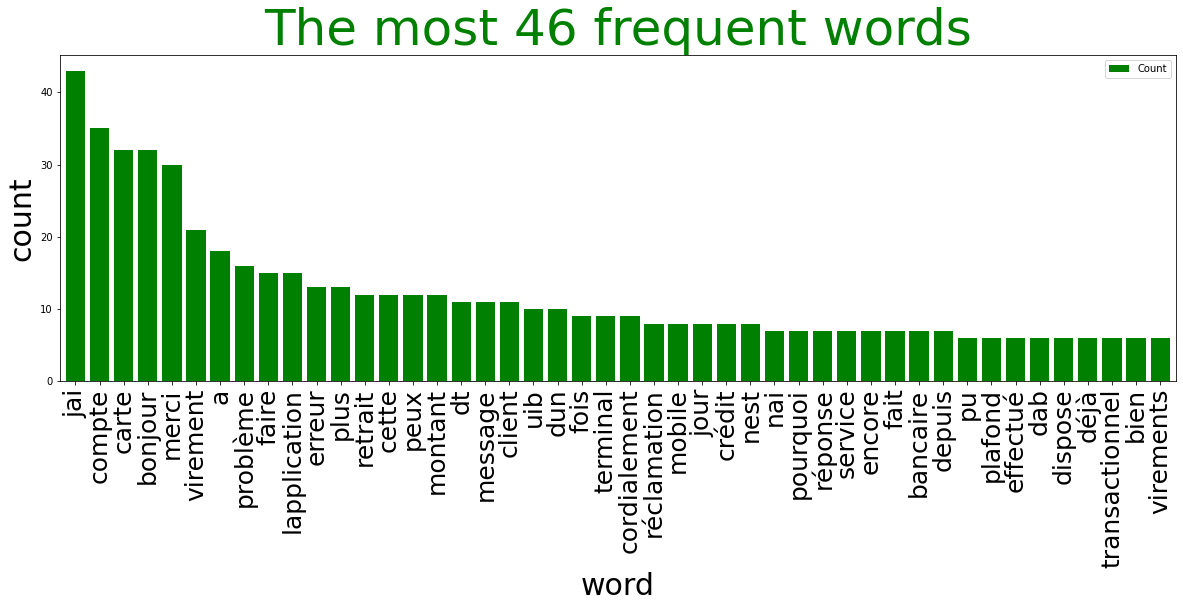

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame(most_freq_word, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count',width=0.8,color='green',figsize=(20,6))
ax = plt.gca()
ax.tick_params(axis='x', colors='black',labelsize=25)
plt.title("The most 46 frequent words",fontsize=50,color='green')
plt.ylabel('count',fontsize=30)
plt.xlabel('word',fontsize=30)
plt.show()

In [33]:
data['Hour']=data['DATE_DEMANDE'].str[9:11]
data['date']=data['DATE_DEMANDE'].str[:8]

### 7-Scatter plot of Complaints hour

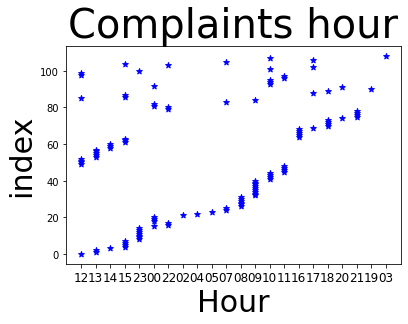

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(data['Hour'], data.index.values,color="blue",marker = '*')

ax = plt.gca()
ax.tick_params(axis='x', colors='black',labelsize=12)
plt.title("Complaints hour",fontsize=40,color='black')
plt.ylabel('index',fontsize=30)
plt.xlabel('Hour',fontsize=30)

plt.show()

### calculate frequency of each hour

In [35]:
from collections import Counter

cd = Counter(data['Hour'])
con = cd.most_common()
  
print(con,'\n')

maximum =0 
for tupl in con: 
    for i in tupl:
        if type(i)==int and maximum<=i:
            maximum=i 
            hour=i-1
            
print('le nombre maximum des réclamations réçues à:',hour,'h')        

[('15', 10), ('09', 10), ('10', 9), ('12', 8), ('23', 8), ('13', 7), ('00', 7), ('08', 6), ('11', 6), ('22', 5), ('16', 5), ('18', 5), ('14', 4), ('07', 4), ('17', 4), ('21', 4), ('20', 2), ('02', 1), ('04', 1), ('05', 1), ('19', 1), ('03', 1)] 

le nombre maximum des réclamations récues à: 9 h


### 8-Date plot 

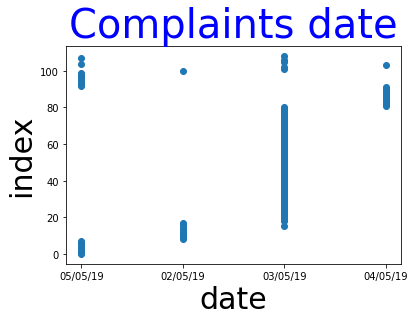

In [36]:
import matplotlib.pyplot as plt

date_list=data['date'].tolist()
plt.plot_date(date_list, data.index.values)

plt.title("Complaints date",fontsize=40,color='blue')
plt.ylabel('index',fontsize=30)
plt.xlabel('date',fontsize=30)

plt.show()

### 9-Search words from dictionary  'frequency_word'

In [103]:
num=int(input("enter a number of words:"))
for i in range(num):
    word=input("entrer a word:")
    dict_w={k:v for k,v in frequency_word.items() if word==k }
    
print(dict_w)

enter a number of words:3
entrer a word:compte
entrer a word:carte
entrer a word:virement
{'virement': 21}
